In [1]:
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt
import matplotlib; mpl =matplotlib

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['svg.fonttype'] = 'none'

mpl.rcParams['figure.figsize'] = (12.0,9.0) # default = (6.0, 4.0)
mpl.rcParams['font.size']      = 36         # default = 10

mpl.rcParams['axes.linewidth']    = 0.75 # default = 1.0
mpl.rcParams['lines.linewidth']   = 1.5 # default = 1.0
mpl.rcParams['patch.linewidth']   = 1.0 # default = 1.0
mpl.rcParams['grid.linewidth']    = 0.5 # default = 0.5
mpl.rcParams['xtick.major.width'] = 1.0 # default = 0.5
mpl.rcParams['xtick.minor.width'] = 1.0 # default = 0.5
mpl.rcParams['ytick.major.width'] = 1.0 # default = 0.5
mpl.rcParams['ytick.minor.width'] = 0.0 # default = 0.5


colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02']

def make_nice_axis(ax):
    """ Function to beautify axis, based on version written by D. Murakowski"""

    ax.spines['top'].set_visible(False) # hide top axs
    #ax.spines['right'].set_position(('outward', 30))
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position(('outward', 10))
    ax.spines['left'].set_position(('outward', 10))
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_tick_params(pad=10)
    ax.yaxis.set_tick_params(pad=10)
    ax.xaxis.set_tick_params(labelsize=32)
    ax.yaxis.set_tick_params(labelsize=32)
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10

    


In [32]:

def fh_free_energy(phi,chi,N):
    f = np.log(phi)*phi/N + (1-phi)*np.log(1-phi) + chi*phi*(1-phi)
    mu = np.log(phi)/N - np.log(1-phi) + (1/N-1) + chi*(1-2*phi)
    J = 1/(phi*N) + 1/(1-phi) -2*chi;
    return(f,mu,J)
    
def find_binodal(y,chi,N):
    (f,mu,J) = fh_free_energy(y,chi,N);
    min_1 = (mu[0] - mu[1])
    min_2 = (mu[0] - (f[0] - f[1])/(y[0]-y[1])) 
    min_3 = np.exp(-10*(y[0]-y[1])**2)
    obj = np.array ([min_1, min_2,min_3]) ;
    return(obj)
    
def find_chi(chi,phi_sat,N):
    chi_range = np.linspace(chi[0],chi[1],100);
    diff = [];
    s_all = {};
    b_all = {};
    for chi in chi_range:
        spinodal = np.roots([1,1/(2*chi) -1 -1/(2*chi*N),1/(2*chi*N)]);
        binodal_points = sp.least_squares(find_binodal,[spinodal[0]*1.12, spinodal[1]*0.45],args=(chi,N),bounds=((1e-12,1e-12),(1-1e-6,1-1e-6)),ftol=1e-13)
        diff.append(abs(binodal_points.x[1] / phi_sat -1));
        s_all[chi]= spinodal;
        b_all[chi] = binodal_points.x;
    chi_opt = chi_range[diff.index(min(diff))];
    spinodal_opt = np.roots([1,1/(2*chi_opt) -1 -1/(2*chi_opt*N),1/(2*chi_opt*N)]);
    binodal_points_opt = sp.least_squares(find_binodal,[spinodal[0]*1.12, spinodal[1]*0.45],args=(chi_opt,N),bounds=((1e-12,1e-12),(1-1e-6,1-1e-6)),ftol=1e-13)

    return (chi_opt,spinodal_opt,binodal_points_opt,s_all,b_all)

In [42]:
N_idr = 50; # in aa/protein
csat = 1e-5; # in moles/L
V_aa = 140 * 1e-30; # Volume of typical aa in m^3/aa
Na = 6.023e23; # Avogadros number
conv_to_millimolar = 1/(N_idr*Na*V_aa); # convert from volume fraction to mM
phi_sat = csat*N_idr*Na*V_aa*1e3;
print('Saturation volume fraction is {}'.format(phi_sat))
chi_min = 0.5*(1+1/N_idr**0.5)**2
print('Critical chi is {}'.format(chi_min))

Saturation volume fraction is 4.2161000000000005e-05
Critical chi is 0.6514213562373095


In [43]:
(chi_opt,spinodal_opt,binodal_points_opt,s_all,b_all) = find_chi([chi_min*1.01,1.2],phi_sat,N_idr);
(f,mu,J) = fh_free_energy(binodal_points_opt.x,chi_opt,N_idr)

print('Optimal \chi is {} '.format(chi_opt))

print(binodal_points_opt.x,f,mu,J)

print('Spinodal points are {} & {} mM'.format(spinodal_opt[1]*conv_to_millimolar,spinodal_opt[0]*conv_to_millimolar))

print('Coexistence concentrations are {} and {} mM ' .format(binodal_points_opt.x[1]*conv_to_millimolar,binodal_points_opt.x[0]*conv_to_millimolar))




Optimal \chi is 0.9426562806119705 
[6.31024443e-01 4.14215615e-05] [-1.54207309e-01 -1.07363128e-05] [-0.23920536 -0.23921457] [  0.85658856 481.95504892]
Spinodal points are 5.506050858661754 & 108.38885028141138 mM
Coexistence concentrations are 0.00982461551555429 and 149.6701793513973 mM 


In [44]:
chi = chi_min*3
N= N_idr
spinodal = np.roots([1,1/(2*chi) -1 -1/(2*chi*N),1/(2*chi*N)]);
chi

1.9542640687119284

<ipython-input-47-17983d12f566>:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes.vlines(phi_sat*conv_to_millimolar,chi_crit/max(s_all.keys()),1,lw=1,Color='grey',label='csat ~ ' + str(round(csat*1e6)) + ' uM' )
<ipython-input-47-17983d12f566>:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes.hlines(chi_crit/chi_opt,1e-6,1e3,lw=1,Color='grey',label='0.5/chi*',LineStyle='--')


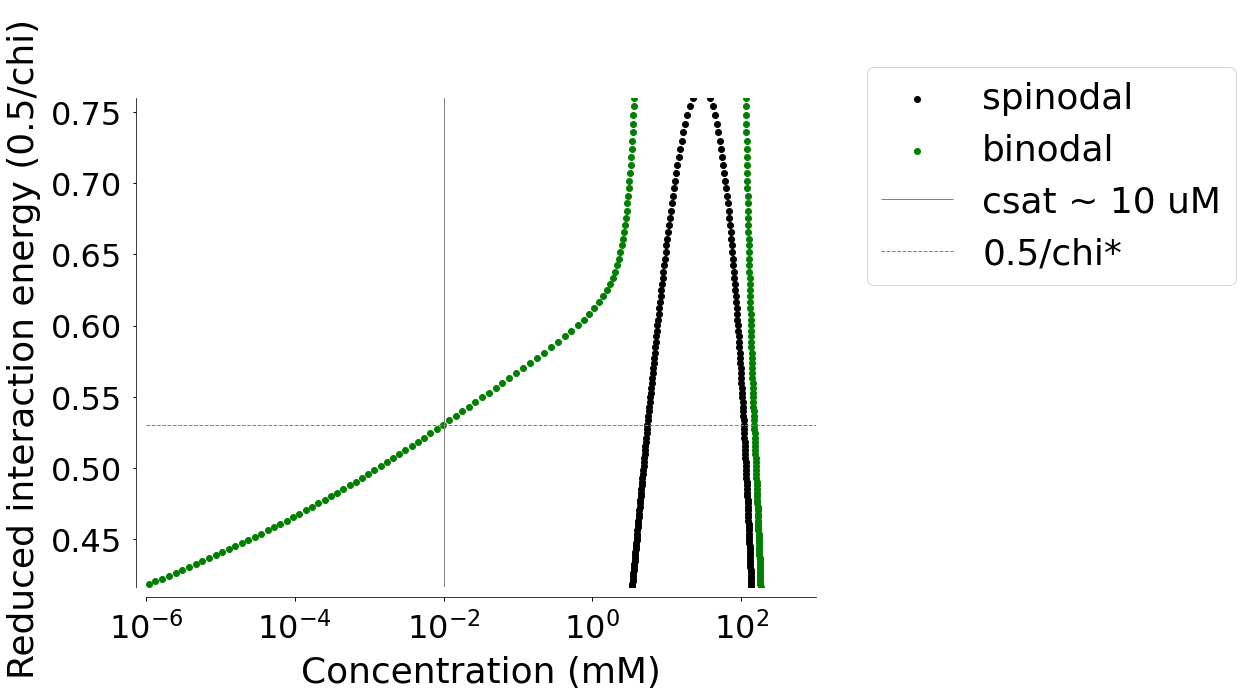

In [47]:
fig,axes = plt.subplots(1,1)
make_nice_axis(axes)
chi_crit = 0.5;

for chi in s_all.keys():
    axes.scatter(s_all[chi][0]*conv_to_millimolar,chi_crit/chi,c='k')
    axes.scatter(s_all[chi][1]*conv_to_millimolar,chi_crit/chi,c='k')
    axes.scatter(b_all[chi][0]*conv_to_millimolar,chi_crit/chi,c='g')
    axes.scatter(b_all[chi][1]*conv_to_millimolar,chi_crit/chi,c='g')  

axes.scatter(s_all[chi][1]*conv_to_millimolar,chi_crit/chi,c='k',label='spinodal')
axes.scatter(b_all[chi][1]*conv_to_millimolar,chi_crit/chi,c='g',label='binodal')  


axes.vlines(phi_sat*conv_to_millimolar,chi_crit/max(s_all.keys()),1,lw=1,Color='grey',label='csat ~ ' + str(round(csat*1e6)) + ' uM' )
axes.hlines(chi_crit/chi_opt,1e-6,1e3,lw=1,Color='grey',label='0.5/chi*',LineStyle='--')
axes.set_xlim((1e-6,1e3))
axes.set_ylim((chi_crit/max(s_all.keys()), chi_crit/min(s_all.keys())))
axes.set_xscale('log')
axes.set_xlabel('Concentration (mM)')
axes.set_ylabel('Reduced interaction energy (0.5/chi) ')
axes.legend(bbox_to_anchor=(1.05,1.1))

file_save = False;
if file_save:
    f_output = folder_name + 'pure_MED1_Flory_chi_' + str(round(chi_opt,2))
    os.makedirs(os.path.dirname(f_output),exist_ok=True)
    plt.savefig(f_output+'.svg',format='svg',dpi=600,bbox_inches='tight')
    plt.savefig(f_output+'.png',format='png',dpi=600,bbox_inches='tight')   
    plt.savefig(f_output+'.pdf',format='pdf',dpi=600,bbox_inches='tight')  
plt.show()

plot_flag = False;

if plot_flag:
    
    phi =np.linspace(1e-6,0.9-1e-6,num=int(1e6) )
    (f,mu,J) = fh_free_energy(phi,chi_opt,N_idr)
    fig,axes = plt.subplots(1,1)
    axes.plot(phi,mu)
    axes.set_xscale('log')
    axes.set_xlabel('phi')
    axes.set_ylabel('$ \mu $')
    plt.show()
    
    fig,axes = plt.subplots(1,1)
    axes.plot(phi,f)
    axes.set_xscale('log')
    axes.set_xlabel('phi')
    axes.set_ylabel('$ f $')
    plt.show()
    
    fig,axes = plt.subplots(1,1)
    axes.plot(phi,J)
    axes.set_xscale('log')
    axes.set_xlabel('phi')
    axes.set_ylabel('$ J $')
    plt.show()